# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [2]:
import pandas as pd 
tabela= pd.read_csv('advertising.csv')
display(tabela)

print(tabela.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

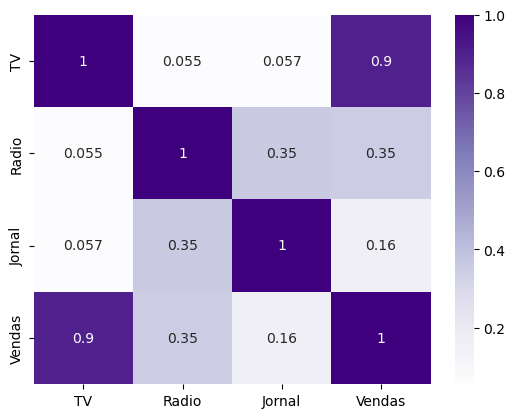

In [3]:
#Criar um gráfico com Matplotlib e Seaborn
#Ja instalei e agora é só importar
import matplotlib.pyplot as plt
import seaborn as sns

#Criar gráfico .heatmap (mapa de calor)
sns.heatmap(tabela.corr(),cmap='Purples',annot=True)
#exibir gráfico 
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [5]:
X= tabela[['TV','Radio','Jornal']]
y= tabela['Vendas']

from sklearn.model_selection import train_test_split
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.30,random_state=3)



#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [6]:
#Importar a inteligencia artificial 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


#Criar a inteligencia artificial 
modelo_regressaolinear= LinearRegression()
modelo_arvoredecisao= RandomForestRegressor()

#Treinar a inteligencia artificial 
modelo_regressaolinear.fit(X_treino,y_treino)
modelo_arvoredecisao.fit(X_treino,y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [8]:
#Testar o AI
previsao_regressaolinear= modelo_regressaolinear.predict(X_teste)
previsao_arvoredecisao= modelo_arvoredecisao.predict(X_teste)

#Avaliar qual o melhor modelo 
#importar o r2_score para avaliação:
from sklearn.metrics import r2_score

print(r2_score(y_teste,previsao_regressaolinear ))
print(r2_score(y_teste,previsao_arvoredecisao))



0.8877675297095177
0.9440065092462625


#### Visualização Gráfica das Previsões

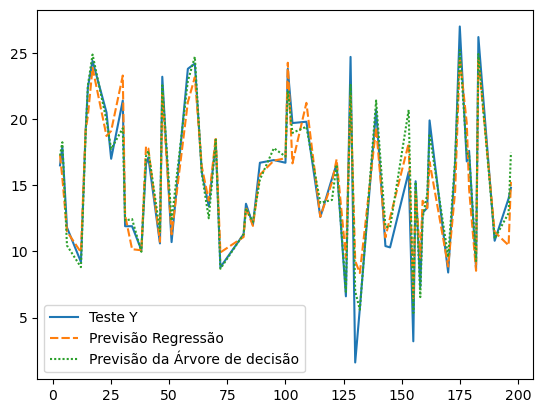

In [9]:
#Criar uma tabela para olhar dar uma olhada

tabela_auxiliar= pd.DataFrame()
tabela_auxiliar['Teste Y'] = y_teste
tabela_auxiliar['Previsão Regressão'] = previsao_regressaolinear
tabela_auxiliar['Previsão da Árvore de decisão'] = previsao_arvoredecisao
#criar um gráfico
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [10]:
nova_tabela = pd.read_csv('novos.csv')
display(nova_tabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [45]:
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)


[ 7.067  8.484 19.238]


#### Qual a importância de cada variável para as vendas?


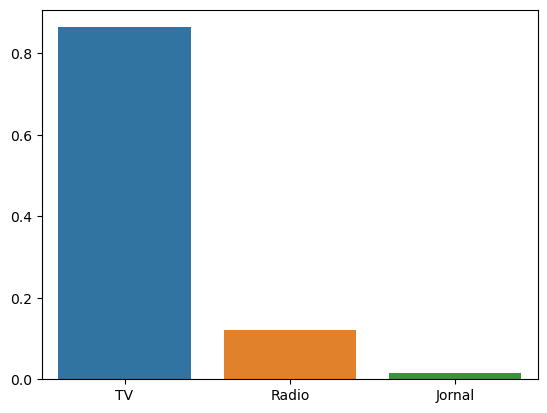

In [11]:
sns.barplot(x=X_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()